In [19]:
# Load Libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotnine import *
import numpy as np # linear algebra
# import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [20]:
# path = "D:\\Fun Projects\\cereals\\data\\cereal.csv"
df0=pd.read_csv("D:\\Fun Projects\\cereals\\data\\cereal.csv", encoding='unicode_escape')
df0.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [21]:
# Check the type of variables
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [22]:
# modify the column names
df0.columns = ['name', 'manufacturer','type','calories','protein','fat','sodium','fiber','carbohydrates','sugar','potassium','vitamins','shelf','weight','cups', 'rating']
df0.head()

,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbohydrates,sugar,potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


## Let us look at the distribution of the variables which indicate the nutritional contents, specifically calories, protein, fat, sodium, fiber, carbo, sugars and potassium.

In [23]:
# select data for the histogram
df = df0[["calories", "protein", "fat", "sodium", "fiber", "carbohydrates", "sugar","potassium","rating","name"]]
df.head()

# Use melt function for the histograms of variables 
df2 = pd.melt(df, id_vars=['name'])
# df2.head()

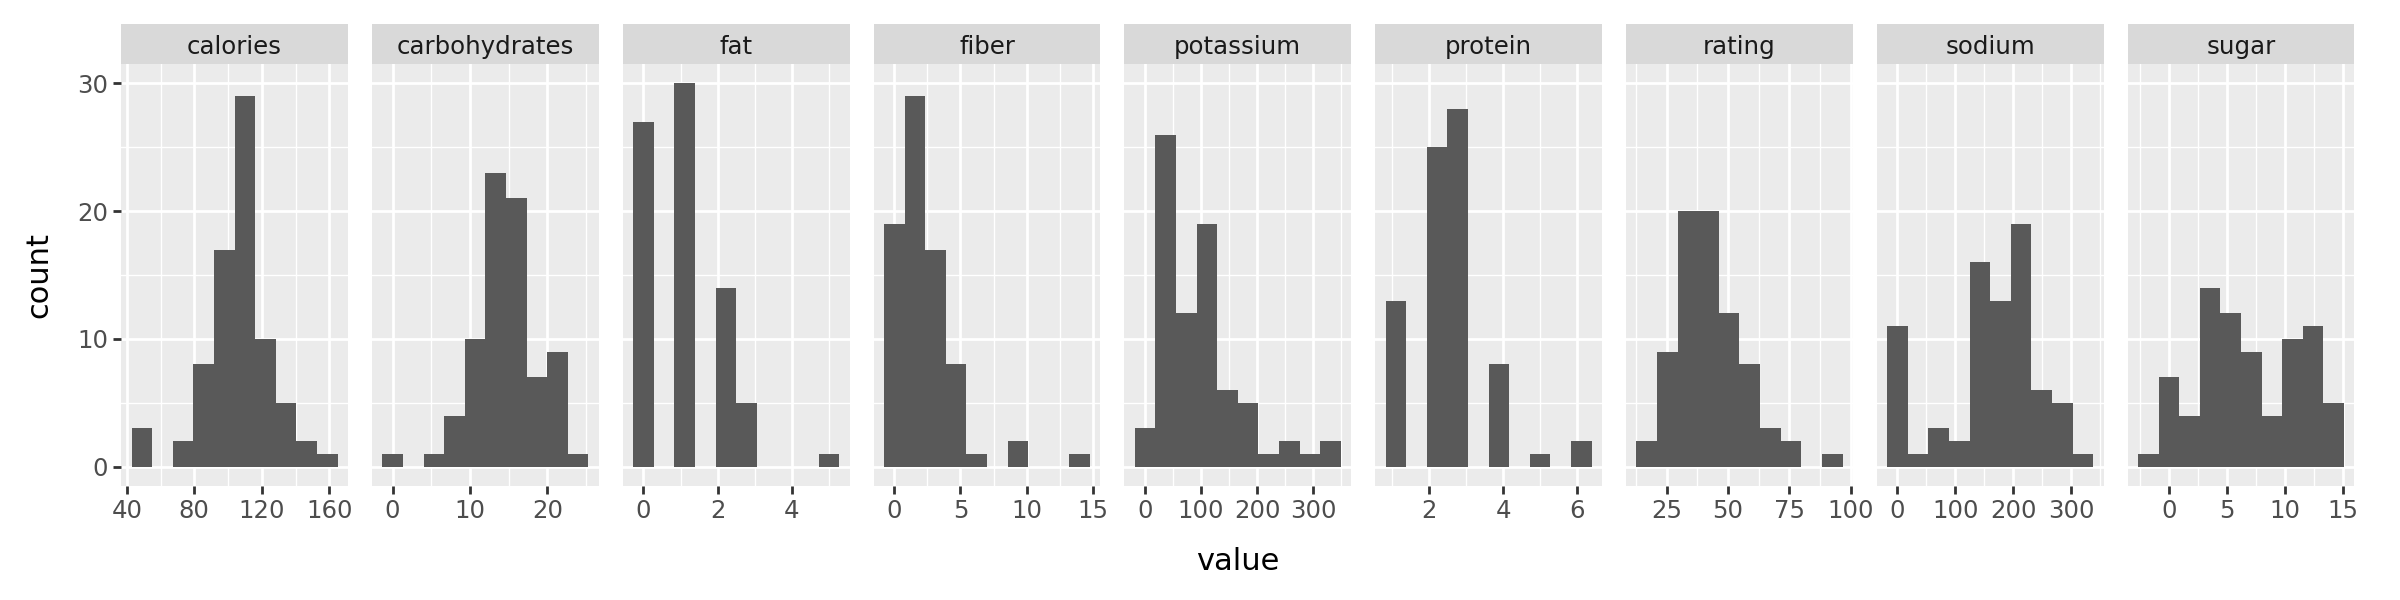

In [24]:
p = (
    ggplot(df2, aes("value"))
    + geom_histogram(bins=10)
    + facet_grid(". ~ variable", scales='free_x')
    + theme(figure_size=(12, 3))
    )

# If we want the density on y axis
# p = (
#     ggplot(df2, aes("value", after_stat("density")))
#     + geom_histogram(bins=10)
#     + facet_grid(". ~ variable", scales='free_x')
#     + theme(figure_size=(12, 3))
#     )

p.show()

In [25]:
# #convert data type to float for all the columns except name
# for i in df.columns[:-1]:
#     df[i]=df[i].astype("float")
# df.info()

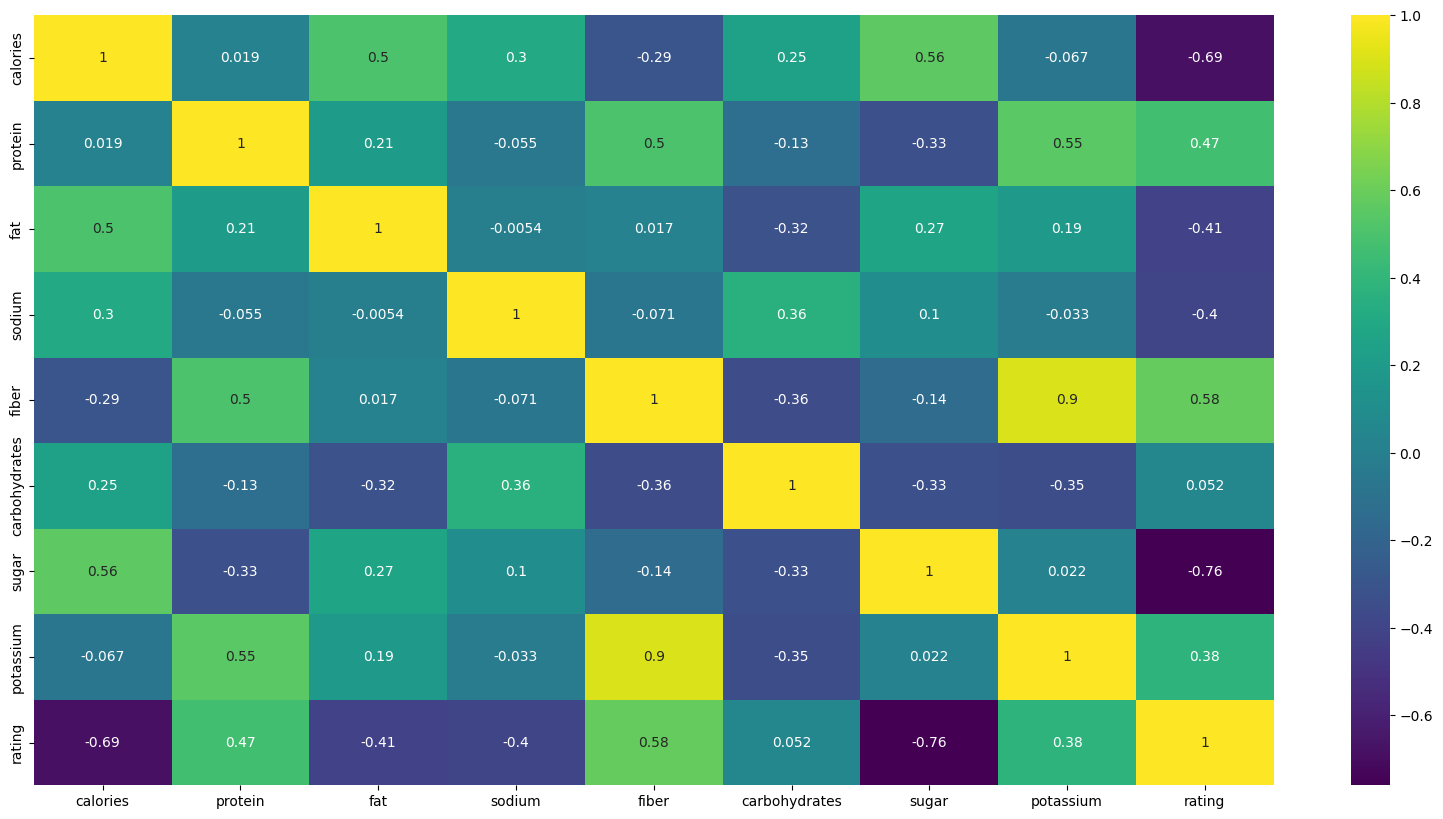

In [26]:
# Correlation plot
plt.figure(figsize=(20,10))
sns.heatmap(df.iloc[:,:-1].corr(),annot=True, cmap="viridis")
plt.show()

Ratings variable has positive correlation with all the variables except sugar, sodium, fat and calories. This seems logical and will be useful when we build a regression model to predict the ratings based on the nutritional contents in cereal.

Next we take a look at the pairs plot which will give us idea about relationship between each pair of variables. Most important from the point of prediction is the last row where rating is the y axis and each of the variable is x axis.

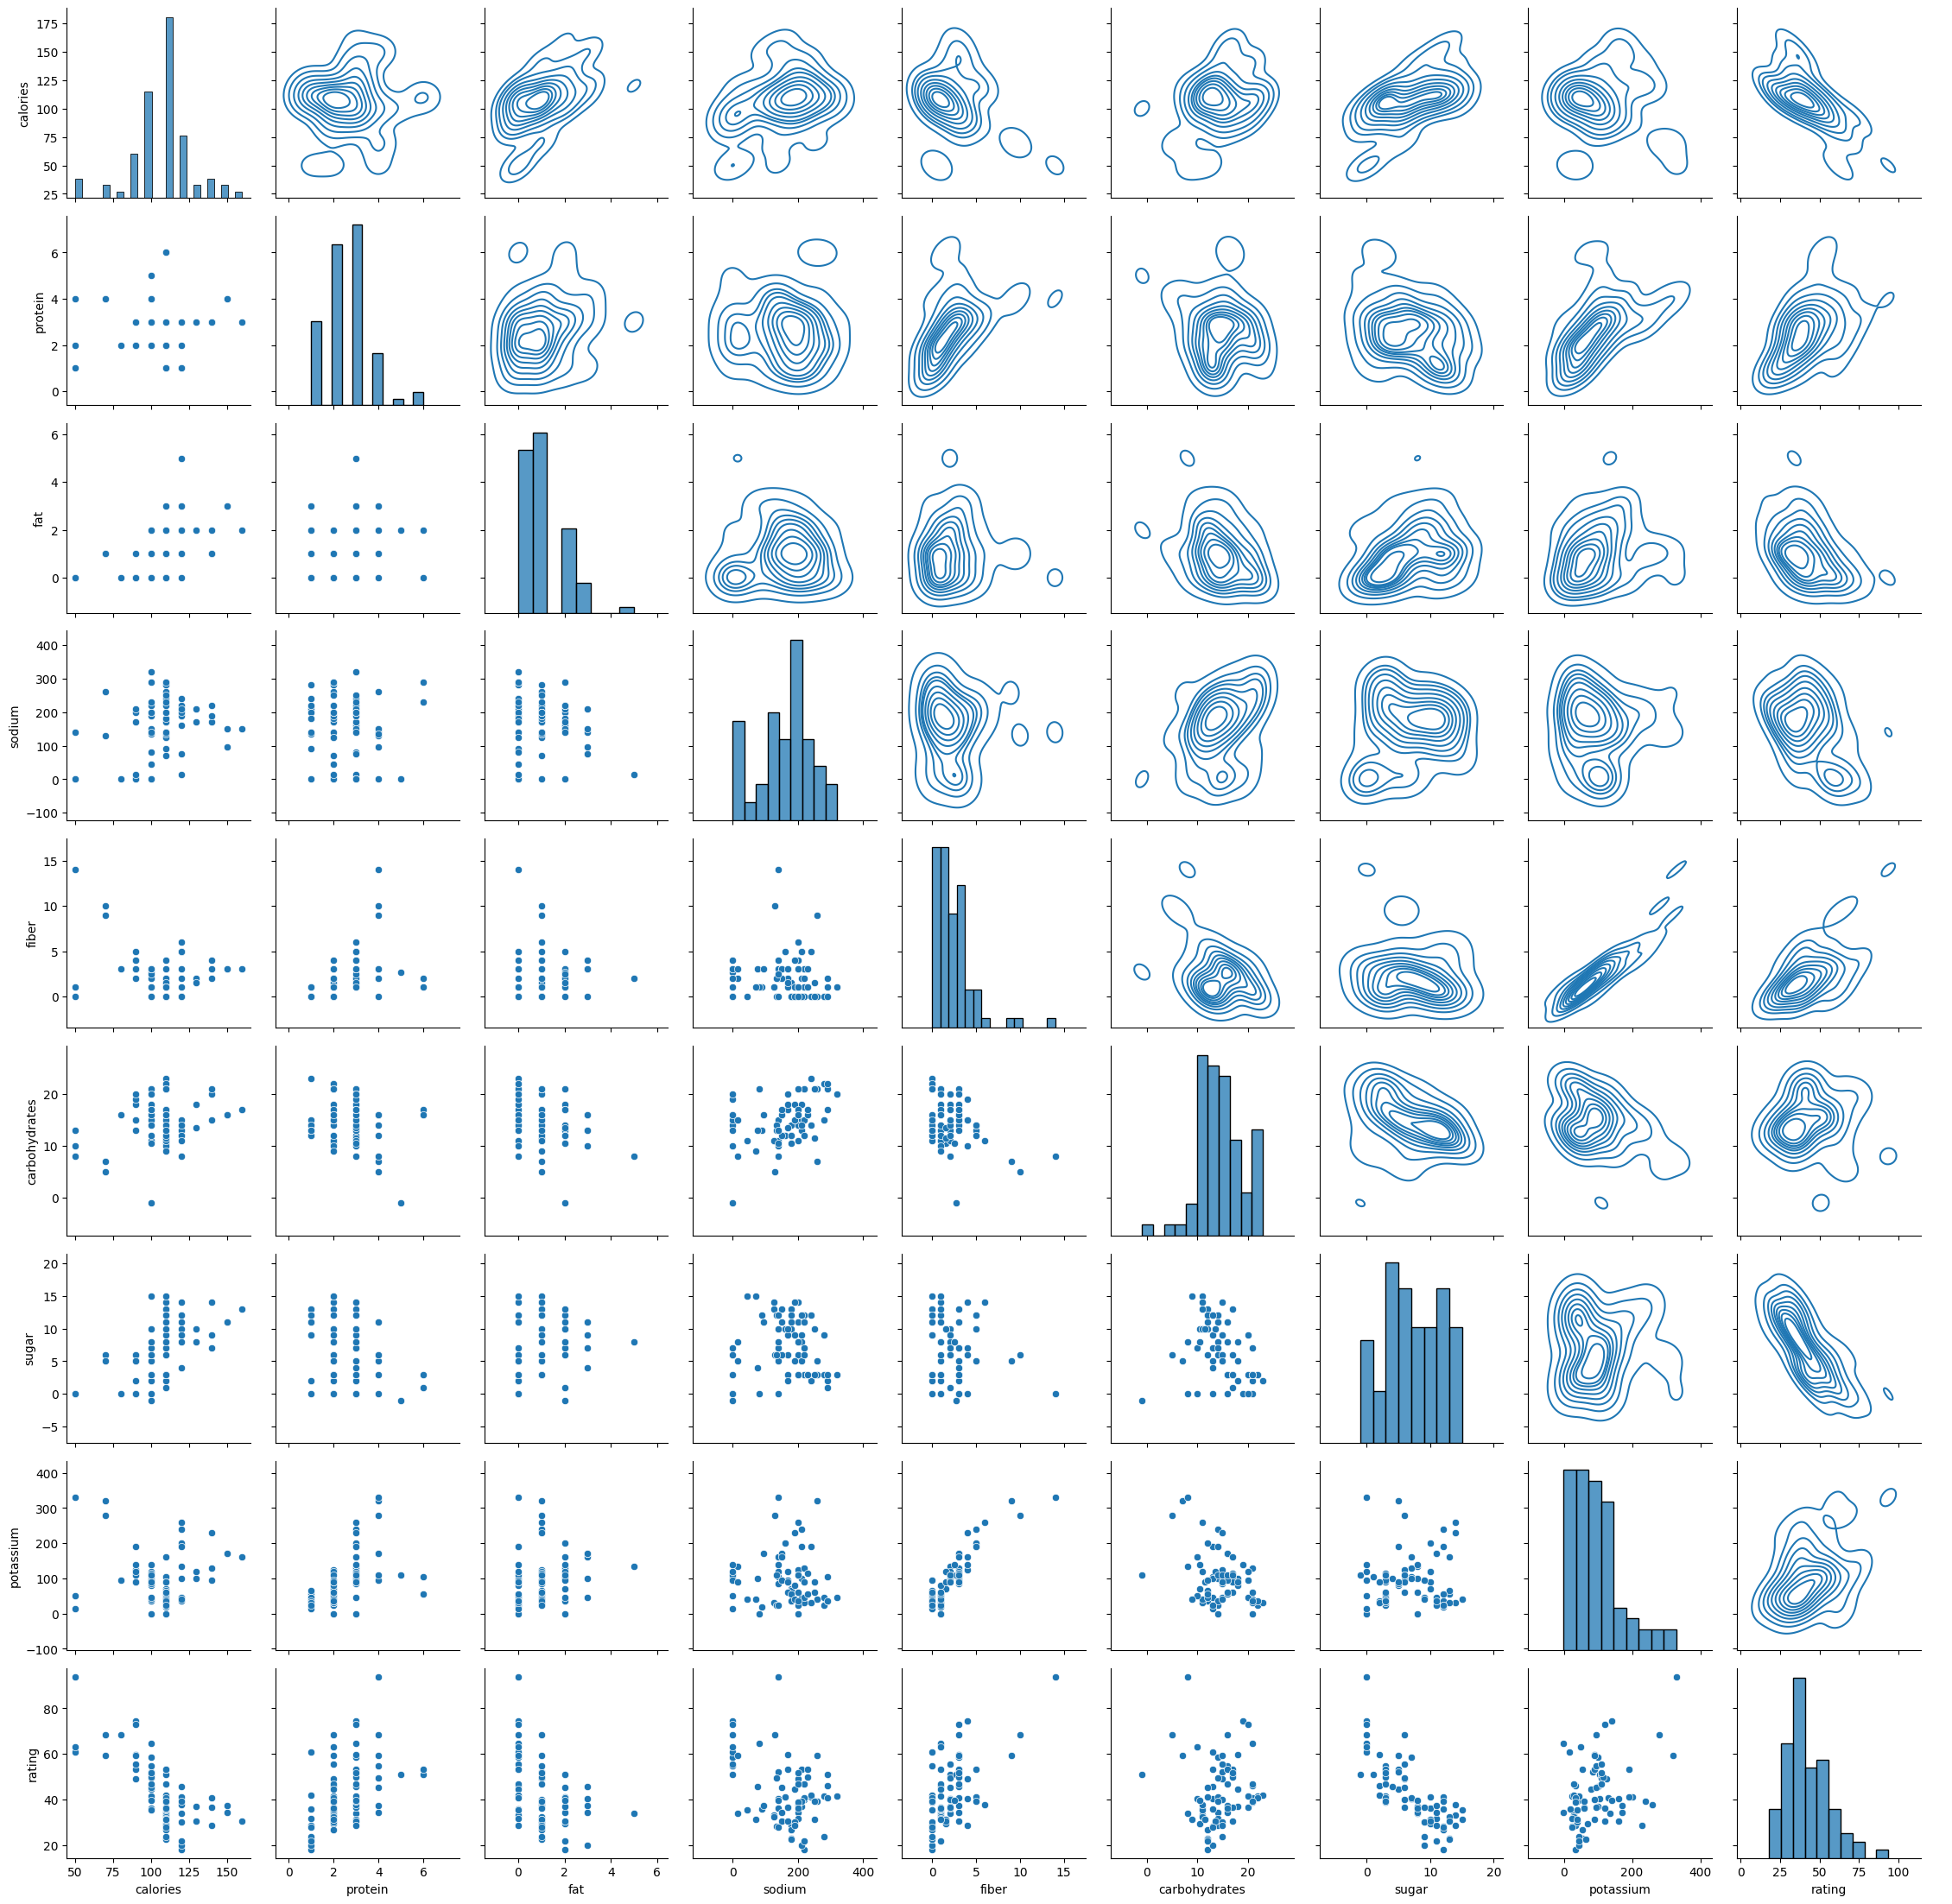

In [27]:
# Pairs plot
g = sns.PairGrid(df.iloc[:,:-1], diag_sharey=False, corner=False)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)
g.add_legend()
plt.show()

In [28]:
# Split data into train and test set
indices = range(len(df)) # Create a list of indices

# Get 75% random indices
random.seed(55) # for reproducible example
random_indices = random.sample(indices, round(0.75*len(df)))

# Training dataset
data_train = df.iloc[random_indices,:-1]

# Testing dataset
data_test = df.iloc[df.index.difference(random_indices),:-1]

# Our aim is to predict the rating as function of calories, protein, fat, sodium, fiber, carbohydrates, sugar and potassium

In [29]:
# Fit the OLS regression
result = smf.ols("rating ~ calories + protein + fat + sodium + fiber + carbohydrates + sugar + potassium", data = data_train).fit()
# check the summary
result.summary()
# dir(result) to check all the available objects we can grab from the results

# # This works as well
# # Fit the OLS regression using sm
# X0=df.iloc[:,2:]
# X = sm.add_constant(X0)
# y = df["calories"]
# result2 = sm.OLS(y,X).fit()
# # check the summary
# result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2429.
Date:                Fri, 16 May 2025   Prob (F-statistic):           6.35e-61
Time:                        18:52:53   Log-Likelihood:                -65.696
No. Observations:                  58   AIC:                             149.4
Df Residuals:                      49   BIC:                             167.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        54.4433      0.868     62.753      0.000      52.700      56.187
calories         -0.2160      0.014    -15.385      0.000      -0.244      -0.188
protein           3.3032      0.152     21.680      0.000       2.997       3.609
fat              -1.8546      0.196     -9.451      0.000      -2.249      -1.460
sodium           -0.0573      0.001    -38.480      0.000      -0.060      -0.054
fiber             3.3924      0.140     24.228      0.000       3.111       3.674
carbohydrates     1.0424      0.048     21.634      0.000       0.946       1.139
sugar            -0.7696      0.054    -14.272      0.000      -0.878      -0.661
potassium        -0.0324      0.005     -6.648      0.000      -0.042      -0.023
==============================================================================
Omnibus:                       78.045   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              801.691
Skew:                          -3.864   Prob(JB):                    8.22e-175
Kurtosis:                      19.492   Cond. No.                     1.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p-value for all the variables is low so they are significantly affecting the response variable of ratings. $R^2$ is 99.5 % which is considerably high. Let us try to make predictions and look at the evaluation metrics.

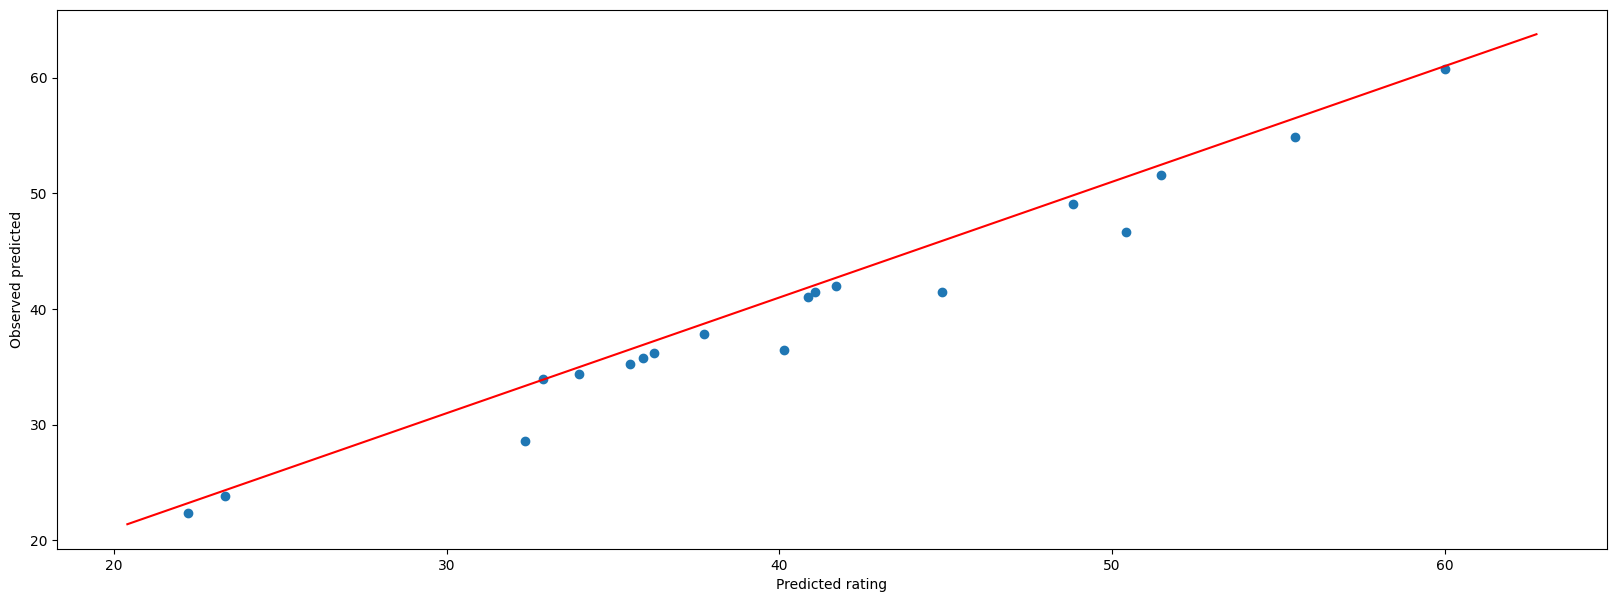

In [30]:
# model = OLS(labels[:half], data[:half])
# results = model.fit()
predictions = result.predict(data_test)

# Observed vs. Predicted plot
plt.figure(figsize=(20,7))
plt.scatter(predictions, data_test["rating"])
# sns.regplot(y = data_test["calories"],x = predictions,ci=None,line_kws={"color":"red"})
plt.ylabel("Observed predicted")
plt.xlabel("Predicted rating")

# Create the abline
x_line = np.linspace(min(data_test["rating"])-2, max(data_test["rating"])+2, 100)
y_line = 1 * x_line + 1
plt.plot(x_line, y_line, color='red')

plt.show()

No serious issues with the observed vs predicted values.

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error:",round(mean_absolute_error(data_test["rating"],predictions),2))
print("Root Mean Squared Error:",round((mean_squared_error(data_test["rating"],predictions))** 0.5,2))

Mean Absolute Error: 1.05
Root Mean Squared Error: 1.72


## The evaluation metrics are also decent. Now we will look at the regression model using the principal component analysis (PCA) as the PCAs help us avoid the multicollinearity issue.

In [32]:
# Principal component analysis
from sklearn.decomposition import PCA

# separate the x and y variable for the training data first
y_train = data_train.iloc[:,-1:]
X0_train = data_train.iloc[:,:-1]

# Standardize the predictor data first
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X0_train)

# Now calculate the principal components
from sklearn.decomposition import PCA

pca = PCA()

principalComponents = pca.fit_transform(X_train)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36079172, 0.24639   , 0.16186567, 0.1045944 , 0.06695072,
       0.04472673, 0.00874256, 0.0059382 ])

The first five principal components explain almost 95% of the variation in the data so we will use only the first five principal components of the data for the regression model.

In [33]:
# First create a data frame with all the principal components
# X_train_pca = pd.DataFrame(data = principalComponents 
#                            ,columns = ['principal component 1', 'principal component 2',
#                                        'principal component 3', 'principal component 4',
#                                        'principal component 5', 'principal component 6',
#                                        'principal component 7'])


X_train_pca = pd.DataFrame(data = principalComponents,
             columns=['PC{}'.format(i+1)
                      for i in range(principalComponents.shape[1])])

# combine the X and Y for the training data
data_train_pca = X_train_pca
data_train_pca.set_index(X0_train.index,inplace = True)
data_train_pca['rating'] = y_train
data_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,rating
11,0.865400,0.737424,3.082256,-0.797678,-1.695220,-0.565655,-0.436512,-0.175165,50.764999
25,-1.656332,-0.688910,-0.969216,1.205505,0.111314,-0.454199,0.373535,-0.159738,31.435973
19,0.979620,2.049689,-0.266540,-0.475020,-0.352195,1.032443,-0.089196,-0.058422,40.448772
38,-0.939218,-0.515171,0.188656,-0.014788,0.070899,0.306183,0.027561,0.007296,36.523683
10,-2.157184,1.069870,-0.921099,0.649449,-0.525503,0.549343,0.091509,-0.057116,18.042851


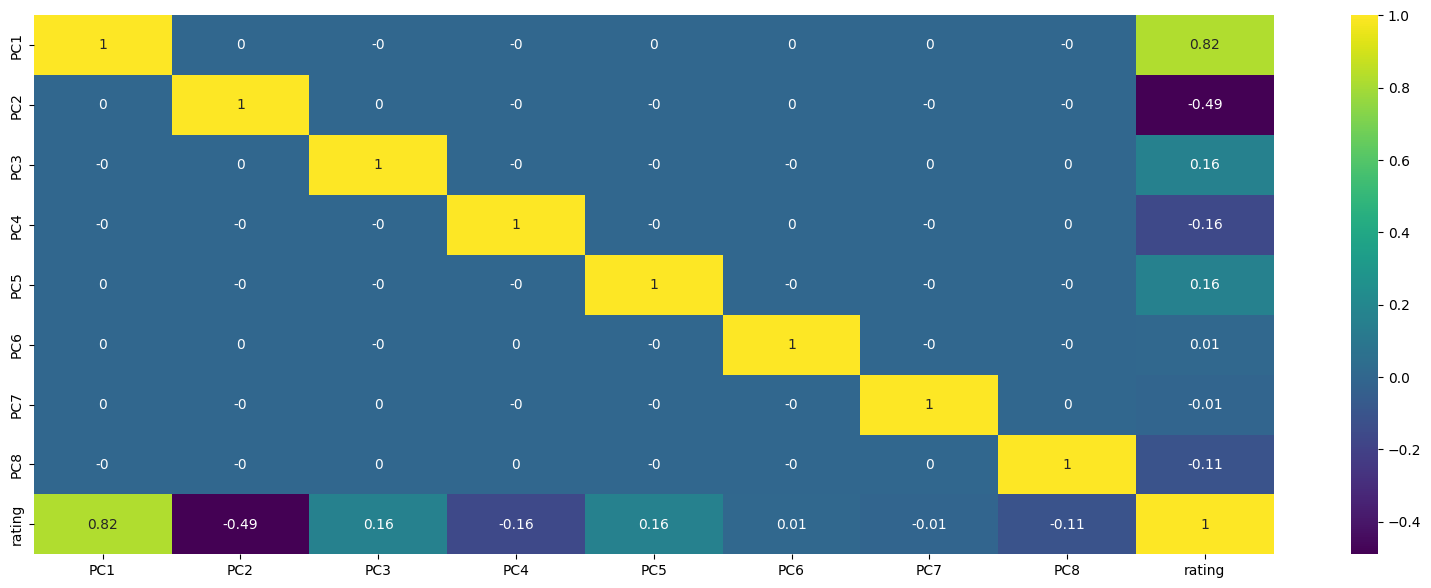

In [34]:
# Correlation plot for principal components
plt.figure(figsize=(20,7))
# sns.heatmap(data_train_pca.corr(),annot=True, cmap="viridis")
sns.heatmap(data_train_pca.corr().round(2),annot=True, cmap="viridis")
plt.show()

Now we can observe that only calories variable has correlation with the principal components and the correlation between the principal components is practically 0.

In [35]:
# Now run the OLS regression model on the first five principal components
# Fit the OLS regression
result_pca = smf.ols("rating ~ PC1 + PC2 + PC3 + PC4 + PC5", data = data_train_pca).fit()
# check the summary
result_pca.summary()
# dir(result) to check all the available objects we can grab from the results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     640.9
Date:                Fri, 16 May 2025   Prob (F-statistic):           2.01e-45
Time:                        18:52:54   Log-Likelihood:                -119.29
No. Observations:                  58   AIC:                             250.6
Df Residuals:                      52   BIC:                             262.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.6488      0.262    166.335      0.000      43.122      44.175
PC1            7.2019      0.154     46.626      0.000       6.892       7.512
PC2           -5.1916      0.187    -27.776      0.000      -5.567      -4.817
PC3            2.1011      0.231      9.111      0.000       1.638       2.564
PC4           -2.6963      0.287     -9.399      0.000      -3.272      -2.121
PC5            3.3596      0.359      9.370      0.000       2.640       4.079
==============================================================================
Omnibus:                        1.300   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.522   Jarque-Bera (JB):                0.698
Skew:                          -0.235   Prob(JB):                        0.705
Kurtosis:                       3.260   Cond. No.                         2.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

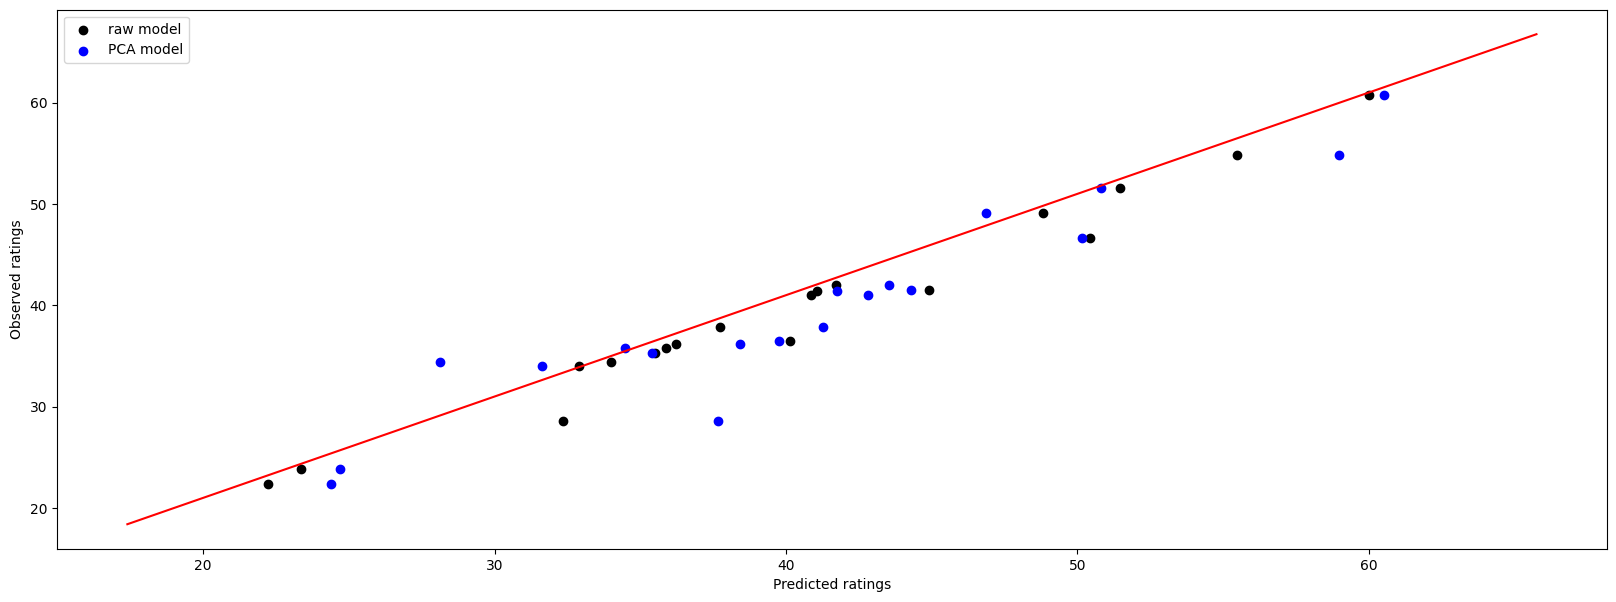

In [36]:
# Now make predictions on the test data
# first calculate the principal components of the testing data
X0_test = data_test.iloc[:,:-1]
X0_test_scaled = sc.transform(X0_test)
X_test = pca.transform(X0_test_scaled)
X_test_pca = pd.DataFrame(data = X_test,
             columns=['PC{}'.format(i+1)
                      for i in range(X_test.shape[1])])

# calculate the predictions
predictions_pca = result_pca.predict(X_test_pca)

# Observed vs. Predicted plot
plt.figure(figsize=(20,7))

plt.scatter(predictions, data_test["rating"], label='raw model', color='black', marker='o')
plt.scatter(predictions_pca, data_test["rating"],  label='PCA model', color='blue', marker='o')
# sns.regplot(y = data_test["calories"],x = predictions,ci=None,line_kws={"color":"red"})
plt.ylabel("Observed ratings")
plt.xlabel("Predicted ratings")
plt.legend()

# Create the abline
x_line = np.linspace(min(data_test["rating"])-5, max(data_test["rating"])+5, 100)
y_line = 1 * x_line + 1
plt.plot(x_line, y_line, color='red')

plt.show()

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error:",round(mean_absolute_error(data_test["rating"],predictions_pca),2))
print("Root Mean Squared Error:",round((mean_squared_error(data_test["rating"],predictions_pca))** 0.5,2))

Mean Absolute Error: 67.66
Root Mean Squared Error: 71.16


For the regression model using first six principal components, Root Mean Squared Error (RMSE) is 67.66 and Mean Absolute Error (MAE) is 71.16 which is a slight improvement from the regression model using the raw data.